# Step 1: Install Torch
Execute the following cell which will install torch and torchvision

In [34]:
!pip install torchvision

# Step 2: Import libraries

In [ ]:
import torch 
import torch.nn as nn 
from torch import optim 
from torchvision import datasets 
from torchvision import transforms 
import matplotlib.pyplot as plt 
%matplotlib inline

# Step 3: Download the CIFAR10 dataset
Excute the cell below

In [35]:
data_path='Downloads/' 
cifar10=datasets.CIFAR10(data_path,train=True,download=True) 
cifar10_val=datasets.CIFAR10(data_path,train=False,download=True)

Files already downloaded and verified
Files already downloaded and verified


# Step 4: Explore the dataset
See the type of cifar10
Get the length of cifar10
Assign image and label of cifar10 at index 1000
Get the class name of label
HINT: Use cifar10.classes[label] to get the name

In [36]:
type(cifar10)

torchvision.datasets.cifar.CIFAR10

In [37]:
len(cifar10),len(cifar10_val)

(50000, 10000)

In [38]:
img,label=cifar10[1000]

In [39]:
cifar10.classes[label]

'truck'

# Step 5: Visualize the image
Use matplotlib to visuazlize image
HINT: just use plt.imshow(...)

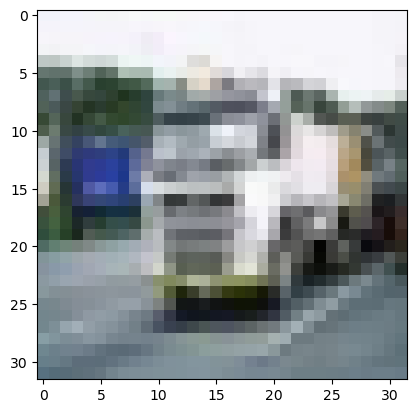

In [40]:
plt.imshow(img)

# Step 6: Transform images
We need to convert the PIL image to a PyTorch tensor
We can easily transform it by adding transform=transforms.ToTensor() when reading the dataset.
This is given below (just execute)

In [41]:
tensor_cifar10=datasets.CIFAR10(data_path,train=True,download=False,transform=transforms.ToTensor())

# Step 7: Normalize images
Now you have all images (transformed) in tensor_cifar10.
To concatenate a stack of images use torch.stack(..., dim=3) on the images
HINT: Use list comprehension to get a list of images from tensor_cifar10 (to exclude labels)
Calculate the mean(dim=1) by applying it on the stack
Calculate the std(dim=1) by applying it on the stack
We will use the results in next step

In [42]:
imgs=torch.stack([img_t for img_t,_ in tensor_cifar10],dim=3) 

In [ ]:
imgs.view(3,-1).mean(dim=1) 


In [ ]:
imgs.view(3,-1).std(dim=1)

# Step 8: Normalize the data
We can add a normalize transform with adding a transforms.Compose([...]), where the list will contain the transforms.
The transform we want are transforms.ToTensor() and transforms.Normalize(...)
HINT: See lesson how it was done
The transforms.Normalize(...) takes two tuples of the results from last step.
Note: that in the lesson it was single numbers, here we hare tuples.
Read the datasets to cifar10 with the new transform
Read the validation dataset to cifar10_val with the new transform

In [43]:
cifar10=datasets.CIFAR10(data_path,train=True,download=False,
                                transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                    (0.2470, 0.2435, 0.2616))]))

In [44]:
cifar10_val=datasets.CIFAR10(data_path,train=False,download=False,
                                transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                    (0.2470, 0.2435, 0.2616))]))

# Step 9: Limit the dataset
There are 10 classes in this dataset - to simplify, we will reduce it to two
We will keep label 0 and 2 ('airplane' and 'bird')
Use list comprehension to filter the datasets.
To simplify use a label_map = {0: 0, 2: 1}, which is used to map label 0 to 0 and label 2 to 1.
Then use list comprehension [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
And similar for cifar10_val

In [45]:
label_map = {0: 0, 2: 1} 
cifar2=[(img, label_map[label]) for img, label in cifar10 if label in [0, 2]] 
cifar2_val=[(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]

# Step 10: Create the model
We create a simple model here
3072 input nodes -> Linear with 512 nodes (Tanh acitivation) -> Linear with 2 nodes (LogSoftmax activation)
To do that use nn.Sequential(...) with the following arguments.
nn.Linear(3072, 512)
Bonus question: Why 3072 input nodes?
nn.Tanh()
nn.Linear(512, 2)
nn.LogSoftmax(dim=1)

In [ ]:
model=nn.Sequential(nn.Linear(3072,512),
                   nn.Tanh(),
                   nn.LogSoftmax(dim=1))  


# Step 11: Train the model
Prepare training data
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
Set the learning_rate = 0.01 (to make it easy to adjust)
Prepare optimizer and loss function.
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
Run the training
n_epochs = 10
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        optimizer.zero_grad()

        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [47]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate) 
loss_fn = nn.NLLLoss() 
n_epochs = 10 
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        optimizer.zero_grad()

    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    loss = loss_fn(outputs, labels)

    loss.backward()
    optimizer.step()
print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 9, Loss: 5.585826


# Step 12: Test the model
Run the following code (where we assume the test data is called cifar10_val and the model model.
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

In [49]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
correct = 0 
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        print("Accuracy: %f", correct / total)

Accuracy: %f 0.515625
Accuracy: %f 0.6015625
Accuracy: %f 0.5885416666666666
Accuracy: %f 0.58984375
Accuracy: %f 0.578125
Accuracy: %f 0.5859375
Accuracy: %f 0.5892857142857143
Accuracy: %f 0.58203125
Accuracy: %f 0.5677083333333334
Accuracy: %f 0.5671875
Accuracy: %f 0.5696022727272727
Accuracy: %f 0.5690104166666666
Accuracy: %f 0.5673076923076923
Accuracy: %f 0.5658482142857143
Accuracy: %f 0.56875
Accuracy: %f 0.572265625
Accuracy: %f 0.5762867647058824
Accuracy: %f 0.5772569444444444
Accuracy: %f 0.5773026315789473
Accuracy: %f 0.58046875
Accuracy: %f 0.5788690476190477
Accuracy: %f 0.5774147727272727
Accuracy: %f 0.5788043478260869
Accuracy: %f 0.5852864583333334
Accuracy: %f 0.58375
Accuracy: %f 0.5817307692307693
Accuracy: %f 0.5798611111111112
Accuracy: %f 0.5786830357142857
Accuracy: %f 0.578125
Accuracy: %f 0.5760416666666667
Accuracy: %f 0.5766129032258065
Accuracy: %f 0.57763671875
Accuracy: %f 0.5767045454545454
Accuracy: %f 0.5753676470588235
Accuracy: %f 0.579464285714

# Step 13 (Optional): Improve the model
Try to improve the model
Simple things you can play with
Adjust the learning rate
Run more epochs
Number of hidden nodes
Medium things to play with
Change activation functions
Add another layer
Advanced things
Let your imagination guide you
For inspiration see state of the art results (wiki)

# Step 14 (Optional): Add more classes
The dataset was limited to two classes (airplanes and birds)
Try to add another class (or more) and see how it changes